## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/50_Startups (1) (1).csv')

In [3]:
len(dataset)

50

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.shape

(50, 5)

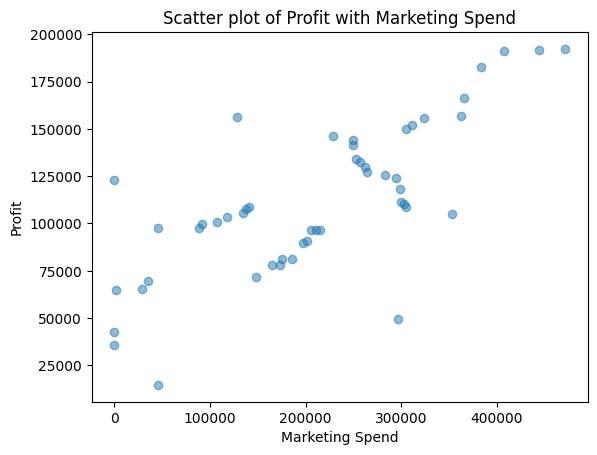

In [6]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

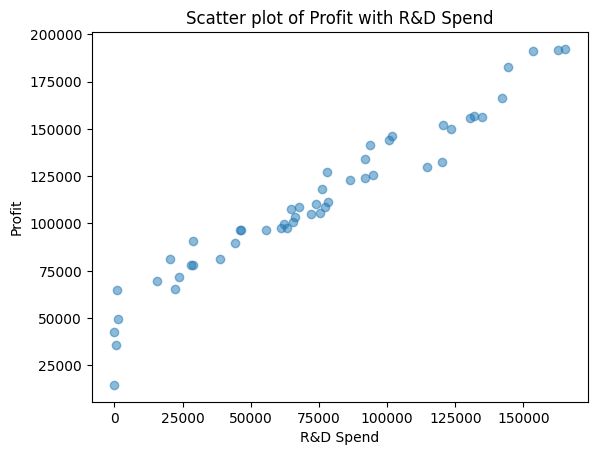

In [7]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

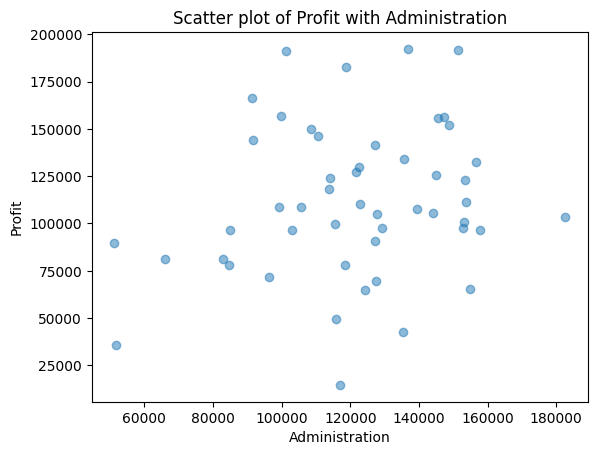

In [8]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

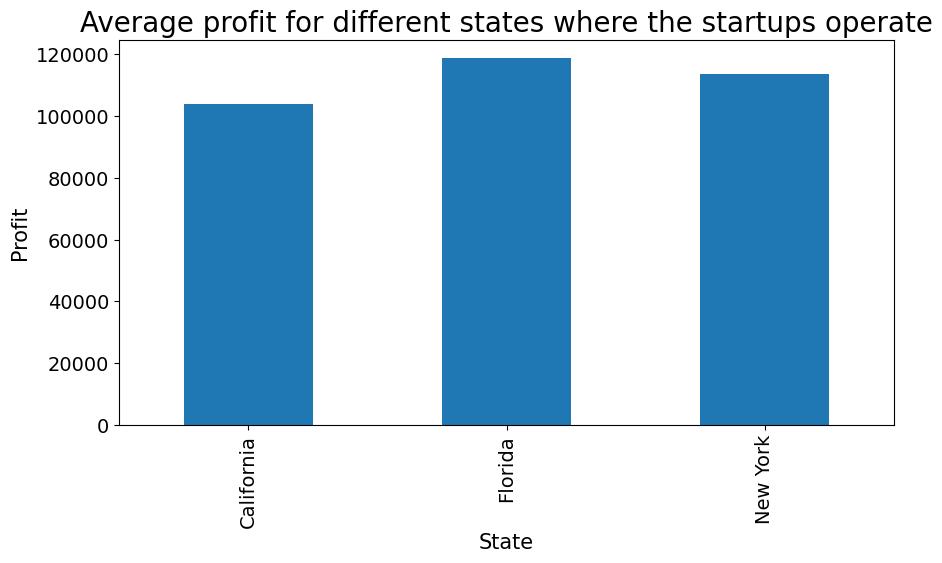

In [9]:
# Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [10]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [11]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [12]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [14]:
dependent_variable = 'Profit'

In [15]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [16]:
independent_variables

['NewYork_State',
 'California_State',
 'Marketing Spend',
 'Administration',
 'Florida_State',
 'R&D Spend']

In [17]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [18]:
dataset[independent_variables]

,NewYork_State,California_State,Marketing Spend,Administration,Florida_State,R&D Spend
0,1,0,471784.10,136897.80,0,165349.20
1,0,1,443898.53,151377.59,0,162597.70
2,0,0,407934.54,101145.55,1,153441.51
3,1,0,383199.62,118671.85,0,144372.41
4,0,0,366168.42,91391.77,1,142107.34
5,1,0,362861.36,99814.71,0,131876.90
6,0,1,127716.82,147198.87,0,134615.46
7,0,0,323876.68,145530.06,1,130298.13
8,1,0,311613.29,148718.95,0,120542.52
9,0,1,304981.62,108679.17,0,123334.88


In [22]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
X_train[0:10]

array([[0.0000000e+00, 0.0000000e+00, 2.1463481e+05, 1.0305749e+05,
        1.0000000e+00, 5.5493950e+04],
       [1.0000000e+00, 0.0000000e+00, 2.0551764e+05, 8.5047440e+04,
        0.0000000e+00, 4.6014020e+04],
       [0.0000000e+00, 0.0000000e+00, 1.3405007e+05, 1.4413598e+05,
        1.0000000e+00, 7.5328870e+04],
       [0.0000000e+00, 1.0000000e+00, 2.1079767e+05, 1.5769392e+05,
        0.0000000e+00, 4.6426070e+04],
       [0.0000000e+00, 0.0000000e+00, 2.9491957e+05, 1.1417579e+05,
        1.0000000e+00, 9.1749160e+04],
       [0.0000000e+00, 0.0000000e+00, 3.2387668e+05, 1.4553006e+05,
        1.0000000e+00, 1.3029813e+05],
       [0.0000000e+00, 0.0000000e+00, 2.5651292e+05, 1.5654742e+05,
        1.0000000e+00, 1.1994324e+05],
       [1.0000000e+00, 0.0000000e+00, 1.9039300e+03, 1.2415304e+05,
        0.0000000e+00, 1.0002300e+03],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.1743150e+04,
        0.0000000e+00, 5.4205000e+02],
       [1.0000000e+00, 0.0000000e+00,

In [24]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train[0:10]

array([[0.        , 0.        , 0.45494286, 0.48655174, 1.        ,
        0.33561668],
       [1.        , 0.        , 0.43561799, 0.3173015 , 0.        ,
        0.2782839 ],
       [0.        , 0.        , 0.28413435, 0.87258866, 1.        ,
        0.45557444],
       [0.        , 1.        , 0.44680961, 1.        , 0.        ,
        0.2807759 ],
       [0.        , 0.        , 0.62511553, 0.59103645, 1.        ,
        0.55488118],
       [0.        , 0.        , 0.68649342, 0.88568959, 1.        ,
        0.7880179 ],
       [0.        , 0.        , 0.54370828, 0.98922572, 1.        ,
        0.72539353],
       [1.        , 0.        , 0.0040356 , 0.6847981 , 0.        ,
        0.0060492 ],
       [1.        , 0.        , 0.        , 0.00432296, 0.        ,
        0.00327821],
       [1.        , 0.        , 0.22709197, 0.95618996, 0.        ,
        0.39676926]])

In [26]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
regressor.intercept_

44153.954667848644

In [28]:
regressor.coef_

array([ 7.86007422e+02,  8.66383692e+01,  1.72720281e+04,  3.49927567e+03,
       -8.72645791e+02,  1.27892182e+05])

In [29]:
y_pred_train = regressor.predict(X_train)

In [30]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [31]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [32]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [33]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [34]:
mean_squared_error(y_test, y_pred)

83502864.0325773

In [35]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.666612578969

In [36]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.99015279494

In [37]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [38]:
r2_score(y_test, y_pred)

0.9347068473282425

In [39]:
from sklearn.linear_model import Lasso, Ridge

In [54]:
lasso_reg = Lasso(alpha=0.1,fit_intercept = True)
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.744e+08, tolerance: 6.550e+06
  model = cd_fast.enet_coordinate_descent(


In [55]:
ridge_reg = Ridge(alpha=1.0,fit_intercept = True)
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_test)

In [56]:
print("Lasso Coefficients:", lasso_reg.coef_)
print("Ridge Coefficients:", ridge_reg.coef_)

Lasso Coefficients: [   531.61660561   -167.12252885  17270.13422844   3497.44291572
  -1125.93879619 127892.8917656 ]
Ridge Coefficients: [ 3201.20228142 -1188.66161041 36977.91678357 13521.86029009
 -2012.54067101 83724.57523864]


In [57]:
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

In [58]:
print("Lasso Mean Squared Error:", lasso_mse)
print("Ridge Mean Squared Error:", ridge_mse)

Lasso Mean Squared Error: 83493406.3026387
Ridge Mean Squared Error: 253197124.1995203


In [59]:
print(X_test.shape)
print(y_test.shape)


(10, 6)
(10,)


In [60]:
print(X_test[:5])
print(y_test[:5])


[[0.         0.         0.25042853 1.23448414 1.         0.39946683]
 [0.         1.         0.52936195 0.38067074 0.         0.60884455]
 [0.         0.         0.48573267 0.55737746 1.         0.61635061]
 [0.         0.         0.34861436 0.31413763 1.         0.16869099]
 [0.         0.         0.8646636  0.4685842  1.         0.92798459]]
[103282.38 144259.4  146121.95  77798.83 191050.39]


In [62]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+09, tolerance: 6.011e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+09, tolerance: 5.722e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.318e+08, tolerance: 4.896e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [63]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -136060583.65656775


In [67]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([102906.35317556, 132967.25765707, 133258.65240416,  73203.68758941,
       178963.50295179, 115117.74749179,  68377.73691095,  98401.59556433,
       114139.07586929, 168646.45135444])

In [69]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37759e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [70]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -137563097.34320524


In [ ]:


Mean:

The mean is the sum of all values divided by the number of values in a dataset. It is a measure of central tendency that indicates the average value of the data. In the context of machine learning, the mean can be used to:

 Summarize the data: The mean can be used to provide a concise representation of the data by giving a single value that represents the typical value in the dataset.
 Identify outliers: Values that are significantly different from the mean may be considered outliers. These outliers can be investigated further to determine if they are errors or if they represent genuine differences in the data.
 Make predictions: The mean can be used to make predictions about future values. For example, if a machine learning model is trained on a dataset of historical sales data, the mean of the sales values can be used to predict future sales.

Mode:

The mode is the value that occurs most frequently in a dataset. It is a measure of central tendency that indicates the most common value in the data. In the context of machine learning, the mode can be used to:

 Identify the most common value: The mode can be used to identify the most common value in a dataset. This information can be useful for understanding the distribution of the data and for making predictions about future values.
 Classify data: The mode can be used to classify data into different categories. For example, if a machine learning model is trained on a dataset of customer data, the mode of the customer ages can be used to classify customers into different age groups.

Median:

The median is the middle value in a dataset when the values are arranged in ascending order. It is a measure of central tendency that indicates the value that separates the lower half of the data from the upper half. In the context of machine learning, the median can be used to:

 Identify the middle value: The median can be used to identify the middle value in a dataset. This information can be useful for understanding the distribution of the data and for making predictions about future values.
 Handle outliers: The median is less affected by outliers than the mean. This makes it a more robust measure of central tendency when there are outliers in the data.

In [ ]:
Precision: Precision measures the proportion of positive predictions that are actually true positives. In the context of cancer prediction, precision tells us the proportion of patients who were predicted to have cancer who actually have cancer.
Recall: Recall measures the proportion of actual positives that are correctly predicted as positives. In the context of cancer prediction, recall tells us the proportion of patients who actually have cancer who were correctly predicted to have cancer.
In general, it is best to consider both precision and recall when evaluating the performance of a machine learning model for cancer prediction. A model with high precision and high recall is considered to be a good model.

In [5]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [7]:
data = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [8]:
data['class'] = data['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = data[['tenure','MonthlyCharges']].copy()
y = data['class'].copy()


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [10]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [11]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [12]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [13]:
clf.intercept_


array([-1.77408975])

In [14]:
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [15]:
X_test


,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [16]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [17]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]


In [18]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [19]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [21]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)


The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

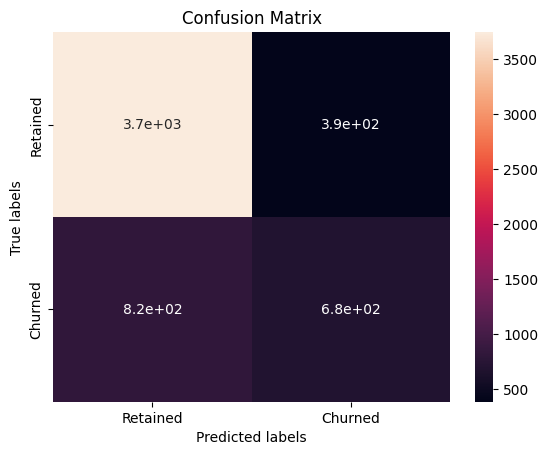

In [22]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

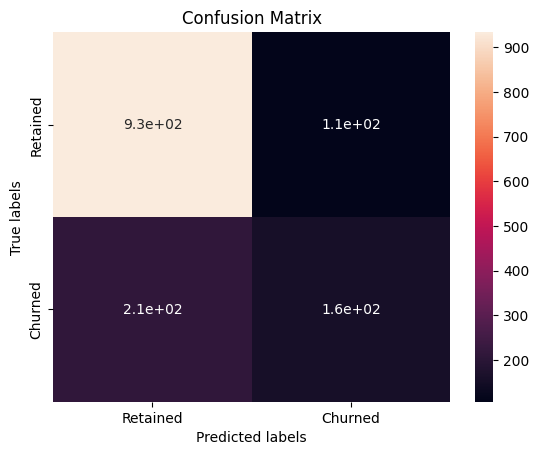

In [23]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [58]:
print(test_class_preds.shape)
print(train_preds.shape)

(1409,)
(5634,)


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(y_train, train_class_preds))
print("\n")
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4133
           1       0.64      0.45      0.53      1501

    accuracy                           0.79      5634
   macro avg       0.73      0.68      0.70      5634
weighted avg       0.77      0.79      0.77      5634



              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1041
           1       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



In [24]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate


In [25]:
logistic = LogisticRegression()

In [26]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s


In [27]:
scores['train_accuracy']


array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [28]:
scores['test_accuracy']

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = classifier.predict(X_test)

In [32]:
y_pred = classifier.predict(X_test)

In [31]:
confusion_matrix(y_pred, y_test)

array([[903, 203],
       [138, 165]])

In [34]:
roc_auc_score(y_pred, y_test)


NameError: name 'roc_auc_score' is not defined

In [33]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(data.iloc[:,0:-1], data['class'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 7043
Resampled dataset shape 3738


In [34]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(data.iloc[:,0:-1], data['class'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_ros))


Original dataset shape: 7043
Resampled dataset shape 10348


In [35]:
print(data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
class                 int64
dtype: object


In [99]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [36]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['class'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7757274662881476


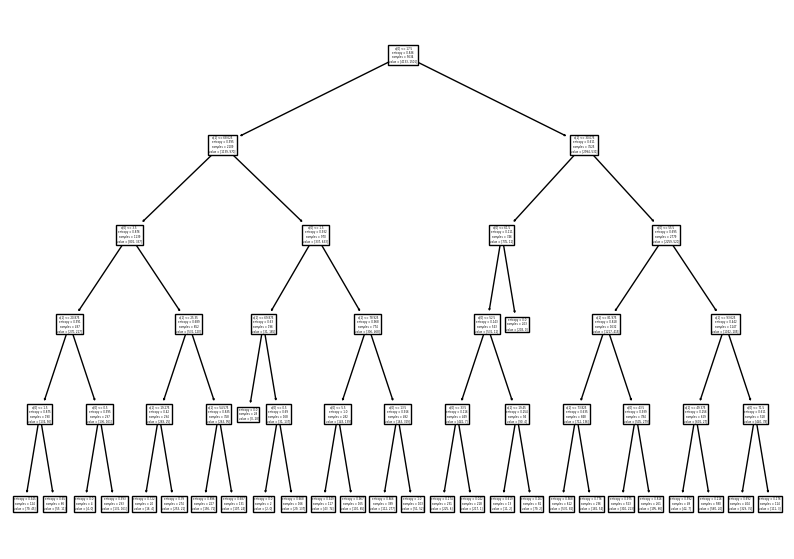

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
hyperparameter_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, hyperparameter_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
dt_classifier_best = DecisionTreeClassifier(**grid_search.best_params_)
dt_classifier_best.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_dt = dt_classifier_best.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt_classifier_best)#, feature_names=X, class_names=['0', '1'], filled=True)
plt.show()

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
hyperparameter_grid = {
    'kernel': ['rbf',  'sigmoid'],
    'C': [10, 100, 1000],
    'gamma': ['scale', 'auto']
}

# Create the SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, hyperparameter_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
svm_classifier_best = SVC(**grid_search.best_params_)
svm_classifier_best.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_svm = svm_classifier_best.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Best hyperparameters: {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7814052519517388


In [44]:
# prompt: from sklearn.ensemble import RandomForestClassifier from sklearn.model_selection import GridSearchCV from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the random forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
hyperparameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, hyperparameter_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
rf_classifier_best = RandomForestClassifier(**grid_search.best_params_)
rf_classifier_best.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_classifier_best.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7771469127040455


In [45]:
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
hyperparameter_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, hyperparameter_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
knn_classifier_best = KNeighborsClassifier(**grid_search.best_params_)
knn_classifier_best.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_knn = knn_classifier_best.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.7700496806245565


In [47]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [48]:
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                     n_estimators=100,
                                     max_samples=0.25,
                                     bootstrap=True,
                                     random_state=42)

# Train the model
bagging_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy:", accuracy_bagging)

# Boosting hyperparameter and code

# Define the boosting classifier
boosting_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                     n_estimators=100,
                                     learning_rate=0.1,
                                     random_state=42)

# Train the model
boosting_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred_boosting = boosting_classifier.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Accuracy:", accuracy_boosting)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7707594038325053


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7125621007806955


In [49]:


# Define the bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                     n_estimators=100,
                                     max_samples=0.25,
                                     bootstrap=True,
                                     random_state=42)

# Train the model
bagging_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy:", accuracy_bagging)

# Boosting hyperparameter and code

# Define the boosting classifier
boosting_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                     n_estimators=100,
                                     learning_rate=0.1,
                                     random_state=42)

# Train the model
boosting_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred_boosting = boosting_classifier.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Accuracy:", accuracy_boosting)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7707594038325053


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7125621007806955
